In [ ]:
!pip install lightkurve

     |████████████████████████████████| 245 kB 25.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 41 kB 221 kB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 4.4 MB 40.7 MB/s 
     |████████████████████████████████| 802 kB 39.5 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 3.2 MB 37.6 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=2282ba4bc96c16907430d7a2e1f6bbb3f6386a74d31e9119986258412223d98a
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=f82222b405df6f5768b13c9d72bfcd7736fc1a932399f3e6c0d607a5f18cd3a8
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for ok

In [ ]:
pip install eleanor

     |████████████████████████████████| 6.7 MB 6.7 MB/s 
     |████████████████████████████████| 832 kB 37.0 MB/s 
     |████████████████████████████████| 245 kB 56.6 MB/s 
     |████████████████████████████████| 4.4 MB 27.3 MB/s 
     |████████████████████████████████| 110.5 MB 1.1 kB/s 
     |████████████████████████████████| 98 kB 6.7 MB/s 
     |████████████████████████████████| 22.3 MB 71.5 MB/s 
     |████████████████████████████████| 41 kB 197 kB/s 
     |████████████████████████████████| 802 kB 44.6 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 3.2 MB 54.6 MB/s 
     |████████████████████████████████| 3.8 MB 40.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 53.4 MB/s 
     |████████████████████████████████| 503 kB 55.0 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for eleanor: filename=eleanor-2.0.3-py2.py3-none-any.whl size=1

In [ ]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import lightkurve as lk


In [ ]:
eleanor.Update(sector=38)

Most recent sector available =  39
This directory already exists!


In [ ]:
star = eleanor.Source(tic=375506058, sector=15)

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 15...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 15 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

100%|██████████| 1197/1197 [00:23<00:00, 51.75it/s]


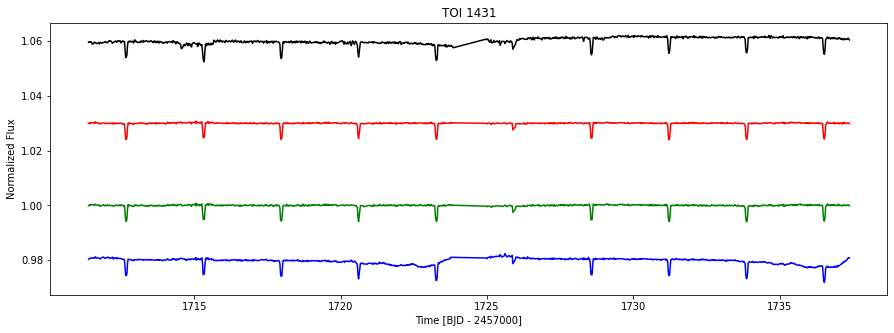

In [ ]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('TOI 1431');

In [ ]:
data.bkg_type

'PC_LEVEL'

In [ ]:
'2D_BKG_MODEL'

'2D_BKG_MODEL'

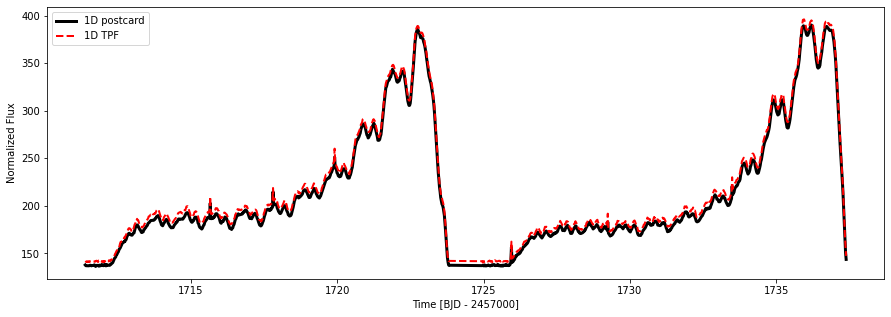

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

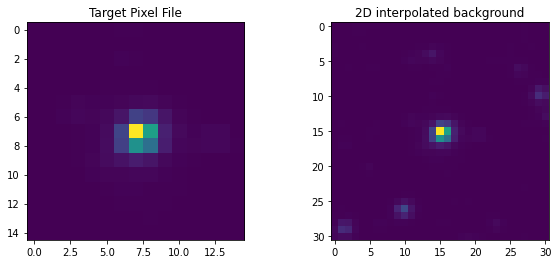

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

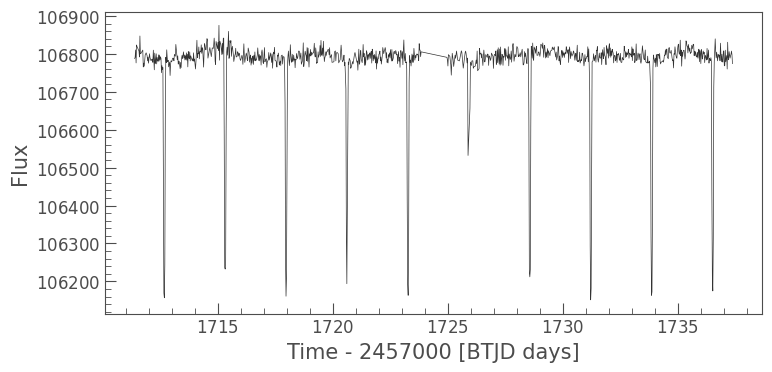

In [ ]:
lk = data.to_lightkurve()
lk.plot()